## Q1)Predicting Number of visits on a website using Time-Series Model(ARIMA)

### Please See the readme file for complete problem statement and dataset


In [360]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import numpy as np

In [361]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [362]:
data = pd.read_csv('/home/prashant/Desktop/solardata.csv',skiprows = 2)

#data.drop(data[data.Month >1],axis =0,inplace =True)


In [363]:
#Changing the columns name because of the space problems
col_names =data.columns
col_names = data.columns.str.replace(' ','_')

col_names

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky_DHI', 'Clearsky_DNI', 'Clearsky_GHI', 'Dew_Point',
       'Temperature', 'Pressure', 'Relative_Humidity', 'Solar_Zenith_Angle',
       'Precipitable_Water', 'Snow_Depth', 'Wind_Direction', 'Wind_Speed',
       'Fill_Flag', 'Unnamed:_21', 'Unnamed:_22', 'Unnamed:_23', 'Unnamed:_24',
       'Unnamed:_25', 'Unnamed:_26', 'Unnamed:_27', 'Unnamed:_28',
       'Unnamed:_29', 'Unnamed:_30', 'Unnamed:_31', 'Unnamed:_32',
       'Unnamed:_33', 'Unnamed:_34'],
      dtype='object')

In [364]:
#Dropping the empty columms which are of no use

data.columns = col_names
drop_list = []

for col in col_names:
   
    if(data[col].isnull().sum() > data.shape[0]/2):
        drop_list.append(col)
        
data.drop(drop_list,axis =1,inplace =True)
data.head()       

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky_DHI,Clearsky_DNI,...,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Snow_Depth,Wind_Direction,Wind_Speed,Fill_Flag
0,2014,1,1,0,30,0,0,0,0,0,...,-4,11.470179,974.890503,31.764560,176.502940,1.148627,0,89.429634,3.827334,0
1,2014,1,1,1,30,0,0,0,0,0,...,-4,10.942517,974.722229,33.315156,166.155587,1.206034,0,88.038315,3.719974,0
2,2014,1,1,2,30,0,0,0,0,0,...,-4,10.462565,974.518005,34.873389,152.817241,1.253349,0,87.193565,3.481867,0
3,2014,1,1,3,30,0,0,0,0,0,...,-4,10.077782,974.263550,36.315791,139.419395,1.304086,0,87.497299,3.253181,0
4,2014,1,1,4,30,0,0,0,0,0,...,-4,9.786384,974.572876,37.494386,126.129768,1.370855,0,87.240990,3.103903,0


In [365]:
#Creating the new variable with name as Date_Time and this will contian all the information regarding date,year,and time

data['Date_Time'] = data.Year.astype(str) + "/" + data.Month.astype(str) + "/" + data.Day.astype(str) + " " + data.Hour.astype(str)+ ":" + data.Minute.astype(str)    
data['Date_Time']=pd.to_datetime(data['Date_Time'])
data['GHI'] =(data['GHI'].astype(float))
     
#Printing year,month,day and time of first 6 rows

data = data.set_index('Date_Time')
Ghi = pd.Series(data.GHI)
data.drop(data.columns,axis =1,inplace=True)
data['GHI']= Ghi
data.head()
#plt.plot(data.Date_Time,data.GHI)

,GHI
Date_Time,
2014-01-01 00:30:00,0.0
2014-01-01 01:30:00,0.0
2014-01-01 02:30:00,0.0
2014-01-01 03:30:00,0.0
2014-01-01 04:30:00,0.0


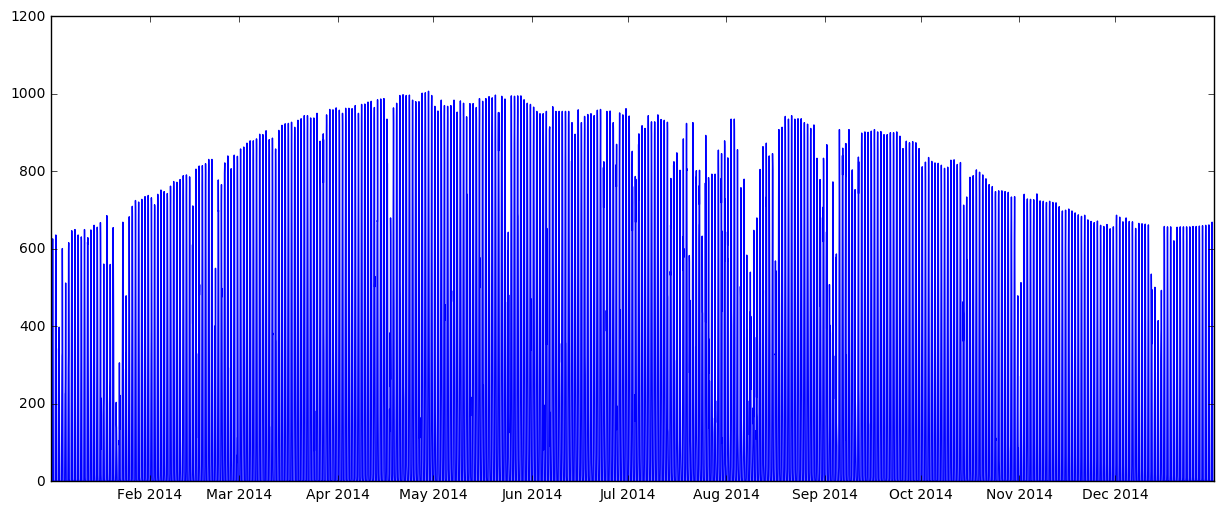

In [366]:
plt.plot(data)

In [367]:
website_data=data['2014-1']
website_data


,GHI
Date_Time,
2014-01-01 00:30:00,0.0
2014-01-01 01:30:00,0.0
2014-01-01 02:30:00,0.0
2014-01-01 03:30:00,0.0
2014-01-01 04:30:00,0.0
2014-01-01 05:30:00,0.0
2014-01-01 06:30:00,0.0
2014-01-01 07:30:00,3.0
2014-01-01 08:30:00,153.0


In [368]:
X =website_data.values
split=(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))


mean1=147.435484, mean2=147.408602
variance1=48161.106053, variance2=50862.026593


/home/prashant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [369]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
timeseries=website_data 
timeseries.dtypes
dftest = adfuller(timeseries.GHI)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
 
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

#result = adfuller(X)
#print('ADF Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#print('Critical Values:')
#for key, value in result[4].items():
 #   print('\t%s: %.3f' % (key, value))

Test Statistic                  -3.994318
p-value                          0.001441
#Lags Used                      20.000000
Number of Observations Used    723.000000
Critical Value (5%)             -2.865546
Critical Value (10%)            -2.568903
Critical Value (1%)             -3.439427
dtype: float64


In [370]:
from numpy import log
X =website_data.values

split=(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=147.435484, mean2=147.408602
variance1=48161.106053, variance2=50862.026593


/home/prashant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


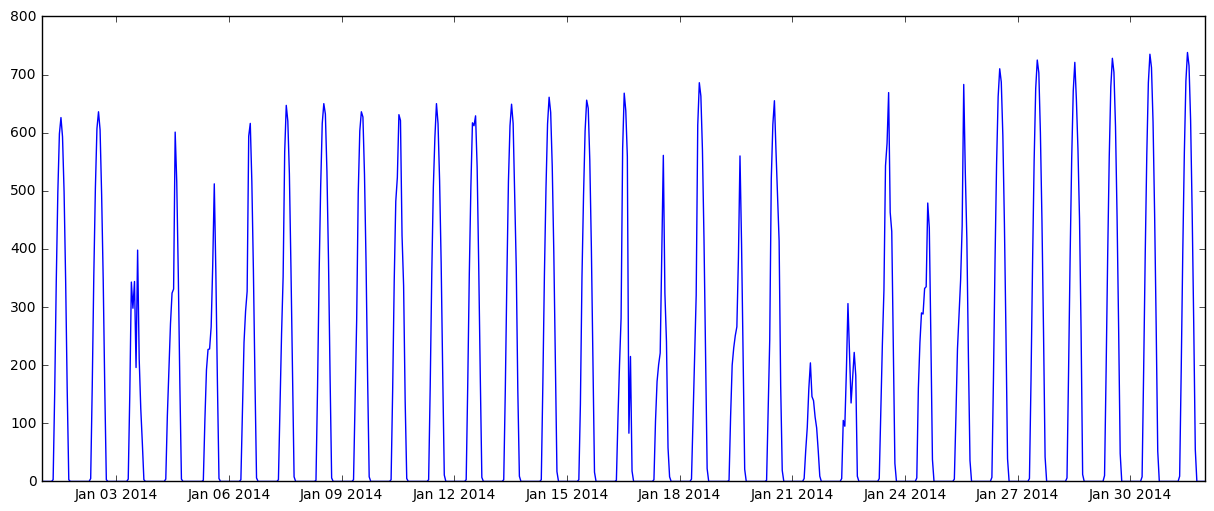

In [371]:
plt.plot(website_data)

In [372]:
#Checking stationary of the series

#from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=10)
    rolstd = pd.rolling_std(timeseries, window=10)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    

/home/prashant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=10).mean()
/home/prashant/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(center=False,window=10).std()


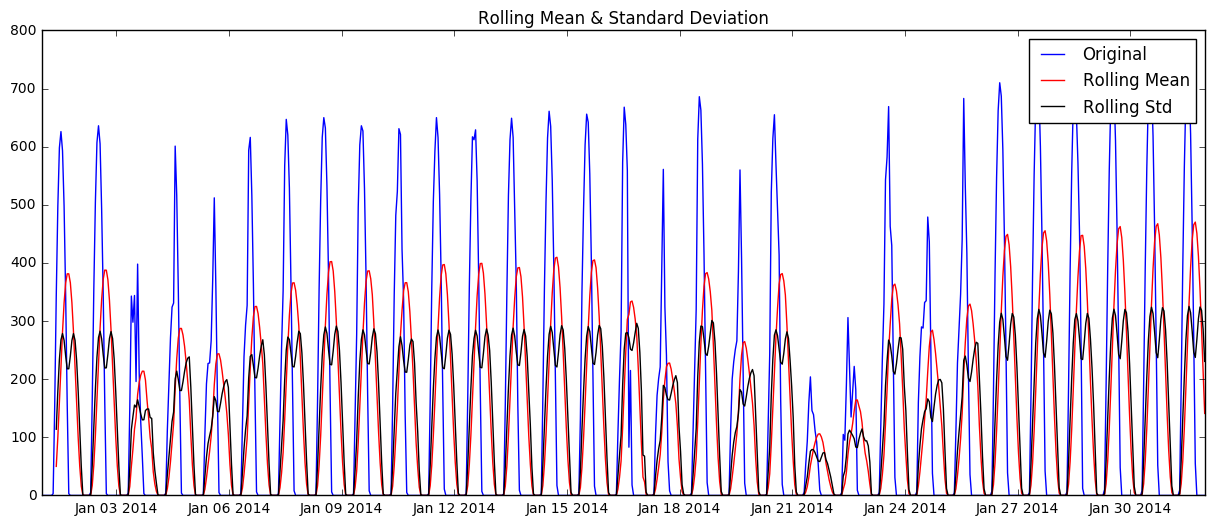

In [373]:
#This Shows that Series is Stationary as Mean and Standrad Deviation are constant over time
test_stationarity(website_data)


In [374]:
from statsmodels.tsa.arima_model import ARIMA


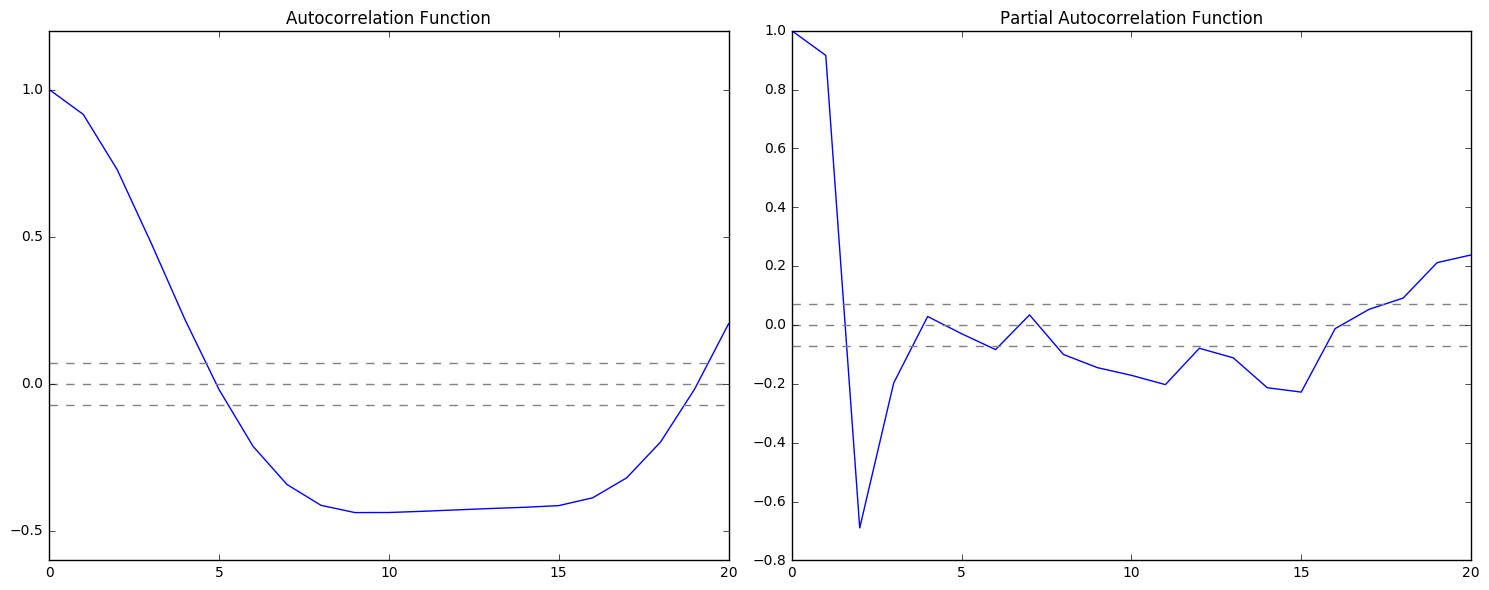

In [375]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(website_data, nlags=20)
lag_pacf = pacf(website_data, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(website_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(website_data)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(website_data)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(website_data)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

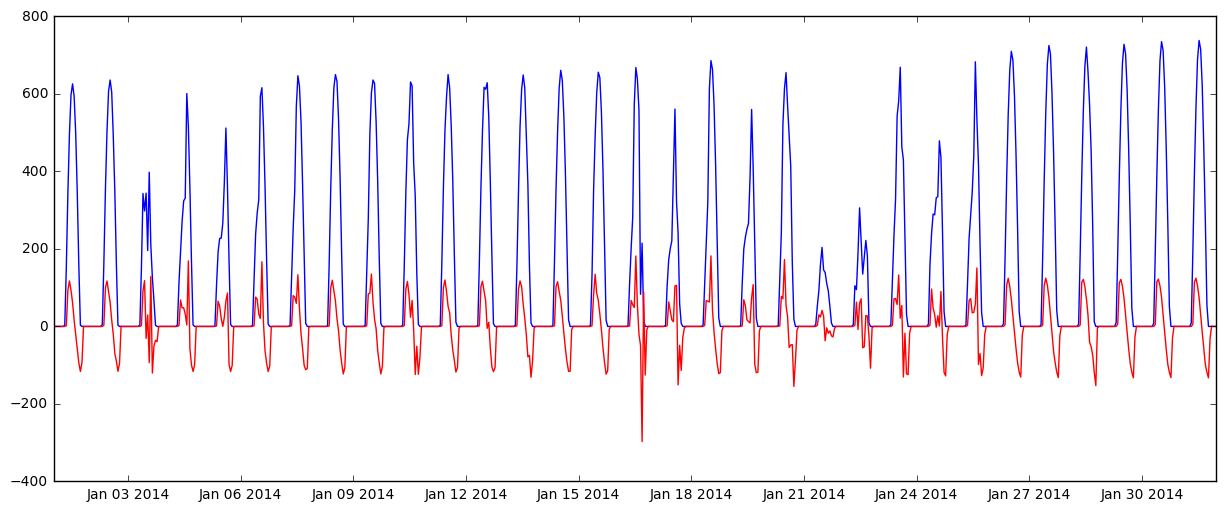

In [379]:
model = ARIMA(website_data, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(website_data)
plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-timeseries)**2))



In [380]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
(predictions_ARIMA_diff.head())

Date_Time
2014-01-01 01:30:00   -0.001543
2014-01-01 02:30:00   -0.000589
2014-01-01 03:30:00   -0.000598
2014-01-01 04:30:00   -0.000598
2014-01-01 05:30:00   -0.000598
dtype: float64

Date_Time
2014-01-01 01:30:00    9.984587e-01
2014-01-01 02:30:00    9.994107e-01
2014-01-01 03:30:00    9.994022e-01
2014-01-01 04:30:00    9.994024e-01
2014-01-01 05:30:00    9.994024e-01
2014-01-01 06:30:00    9.994024e-01
2014-01-01 07:30:00    9.994024e-01
2014-01-01 08:30:00    6.552086e+00
2014-01-01 09:30:00    6.495444e+40
2014-01-01 10:30:00    1.092235e+51
2014-01-01 11:30:00    2.852093e+40
2014-01-01 12:30:00    3.527739e+26
2014-01-01 13:30:00    1.002478e+07
2014-01-01 14:30:00    7.129066e-10
2014-01-01 15:30:00    2.255954e-26
2014-01-01 16:30:00    8.926909e-42
2014-01-01 17:30:00    3.244234e-51
2014-01-01 18:30:00    3.399855e-41
2014-01-01 19:30:00    1.346373e+00
2014-01-01 20:30:00    9.924639e-01
2014-01-01 21:30:00    9.995652e-01
2014-01-01 22:30:00    9.993986e-01
2014-01-01 23:30:00    9.994025e-01
2014-01-02 00:30:00    9.994024e-01
2014-01-02 01:30:00    9.994024e-01
2014-01-02 02:30:00    9.994024e-01
2014-01-02 03:30:00    9.994024e-01
2014-01-02 04:30:0

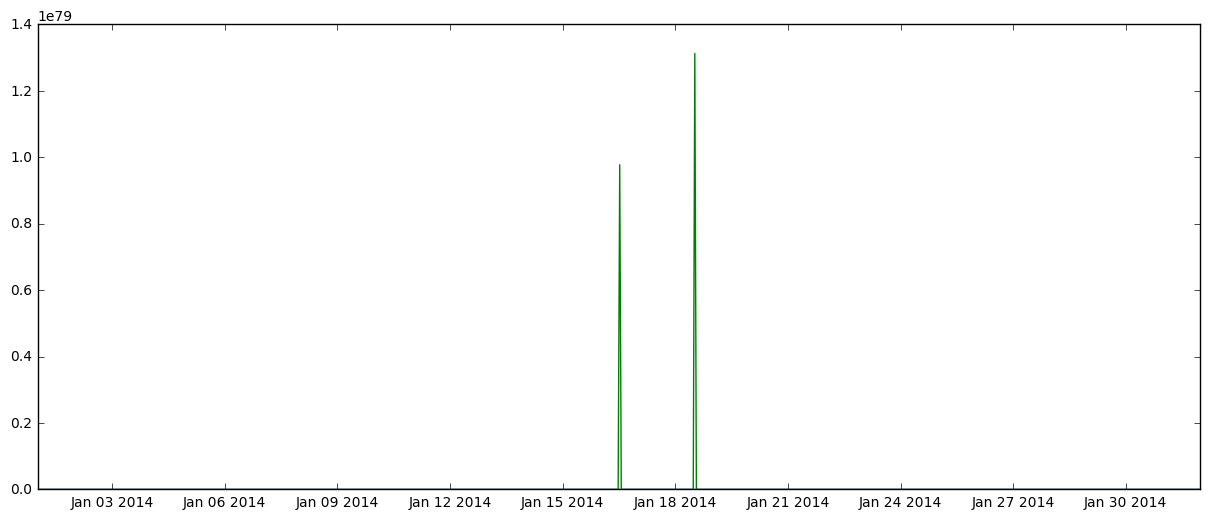

In [381]:
predictions_ARIMA = np.exp(predictions_ARIMA_diff)
print(predictions_ARIMA)
plt.plot(website_data)
plt.plot(predictions_ARIMA)
